<a href="https://colab.research.google.com/github/rinkeshdas01/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

#**Business Objective:**

* The objective of our project is to predict which customer might default on his/her next payment.

*  We are all aware what a credit card is. It is a type of payment card in which charges are made against a line of credit instead of the account holder's cash deposits. Upon making a payment through a credit card, the user has to repay the amount to the bank either in a one-time-payment or in the form of monthly installments.

*  Credit card default happens when you have become severely delinquent on your credit card payments. Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

*  In case of a credit card payment default, the banks have to bear unnecessary trouble.

*  The research aims at developing a mechanism to predict the credit card default beforehand and to identify the potential customer base that can be offered various credit instruments so as to invite minimum default.

In [ ]:
#Importing the necessary libraries and loading the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/default of credit card clients.xls"

In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 3.4 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [ ]:
df=pd.read_excel(path,header=1)

# Observing the dataset

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.shape

(30000, 25)

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# Data Cleaning

In [ ]:
#Checking for null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
#Checking for duplicate values
df.duplicated().sum()

0

There are no null or duplicate values in the dataset.

In [ ]:
#Checking the values in some variables to find some errors
features=['SEX','MARRIAGE','EDUCATION']
for i in features:
  print(df[i].value_counts())

2    18112
1    11888
Name: SEX, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


The variables 'MARRIAGE' and 'EDUCATION' contain some entries which have no mention in the information that we have. 
According to the information:-

SEX
1 = male; 2 = female

MARRIAGE
1 = married; 2 = single; 3 = others

EDUCATION
1 = graduate school; 2 = university; 3 = high school; 4 = others

So we will add the remaining entries to the 'others' category.


In [ ]:
df['EDUCATION'].replace({5:4,6:4,0:4},inplace=True)
df['MARRIAGE'].replace({0:3},inplace=True)

In [ ]:
#Observing the distribution of the variables
def diagnostic_plot(data,variable):
  
  
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  data[variable].hist()
  plt.title(variable)
  
 
  plt.subplot(1,2,2)
  stats.probplot(data[variable],dist='norm',plot=plt)
  plt.show()


In [ ]:
#Defining a function to plot the distribution of relevant variables
def plot_features(data,list_variable):
  for i in list_variable:
    plot=diagnostic_plot(data,i)
  return plot

In [ ]:
list_features=['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

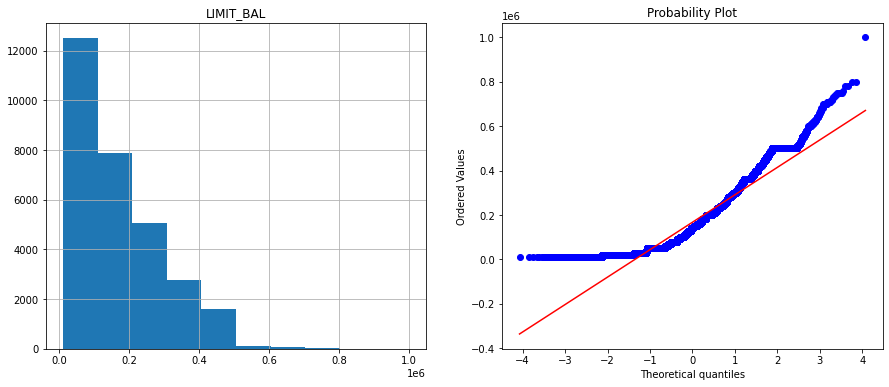

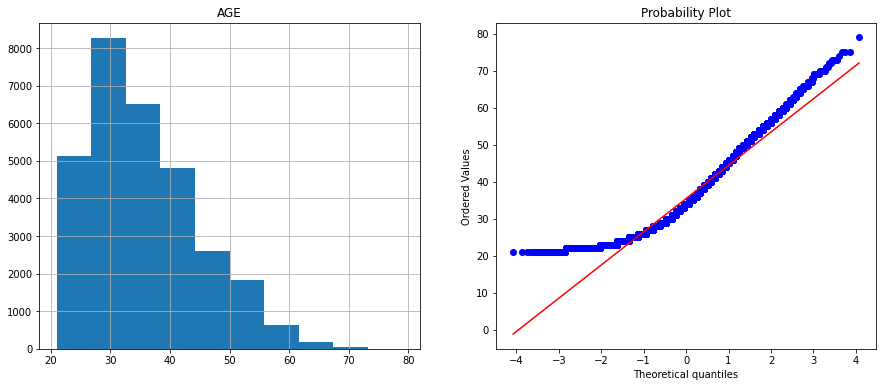

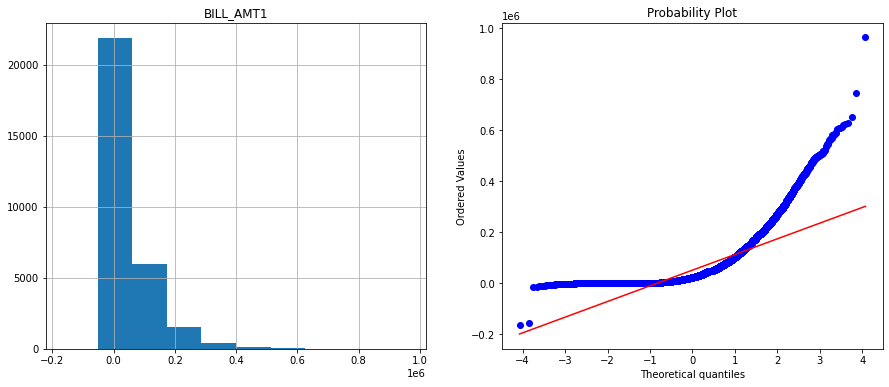

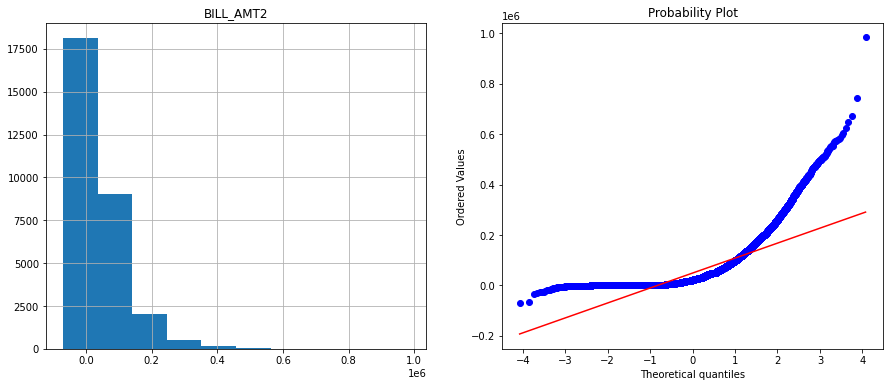

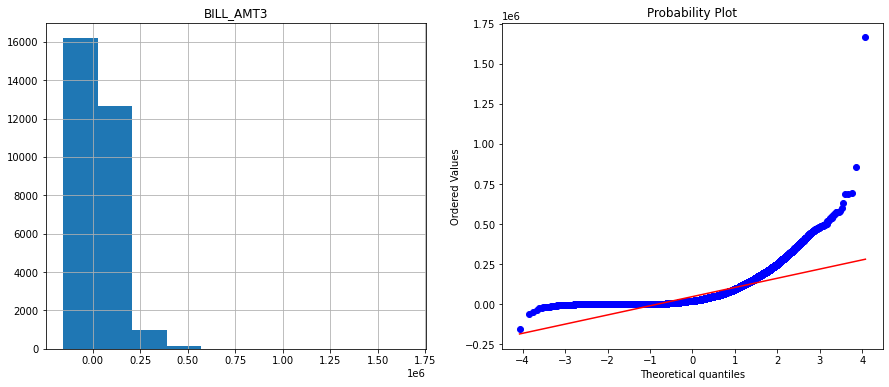

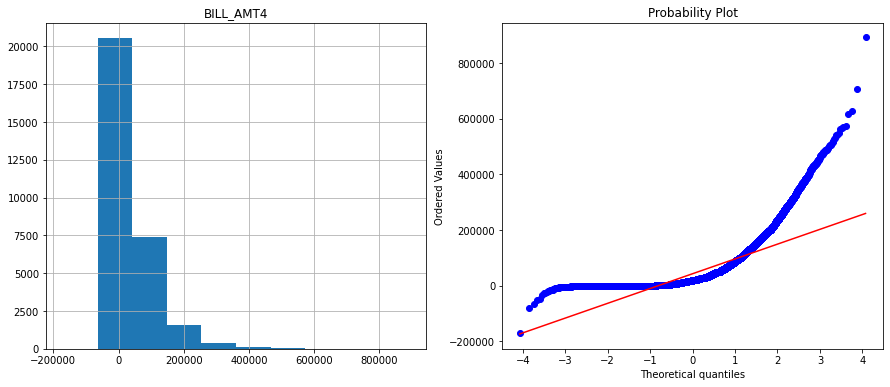

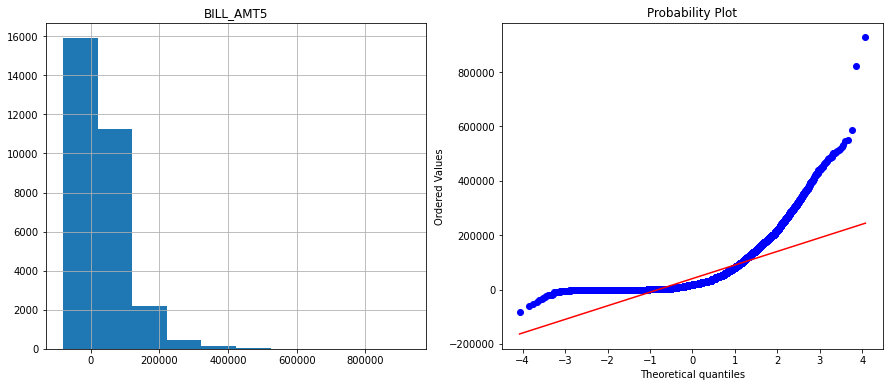

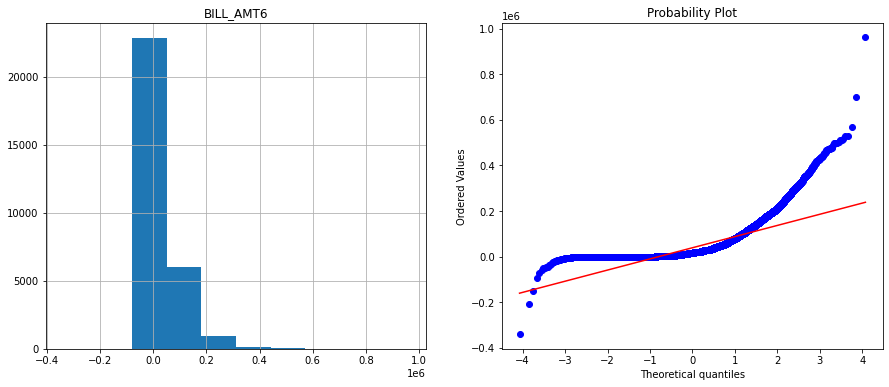

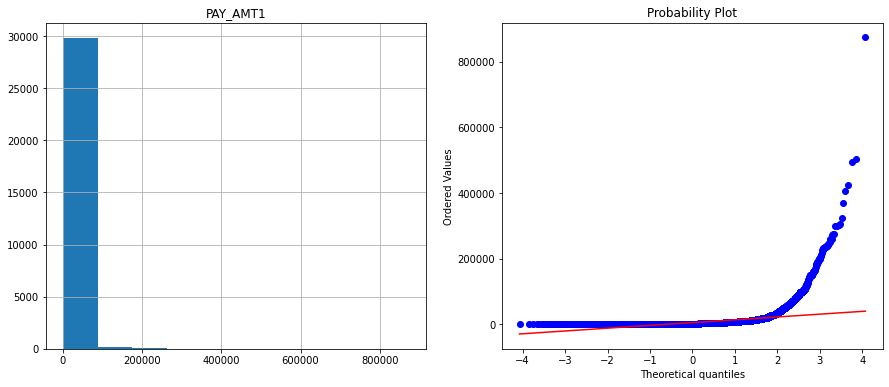

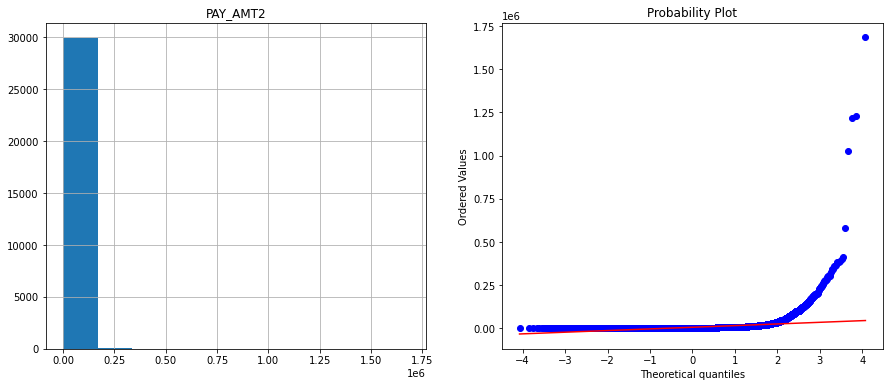

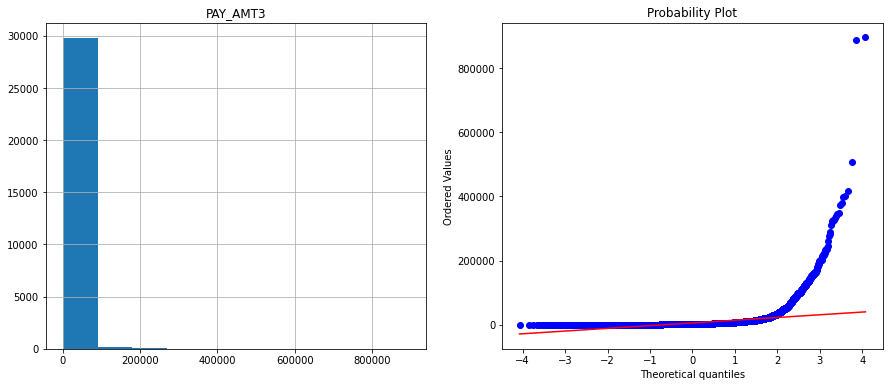

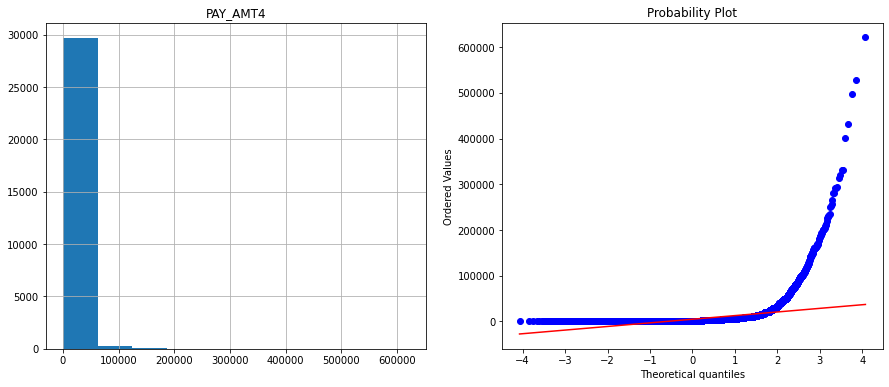

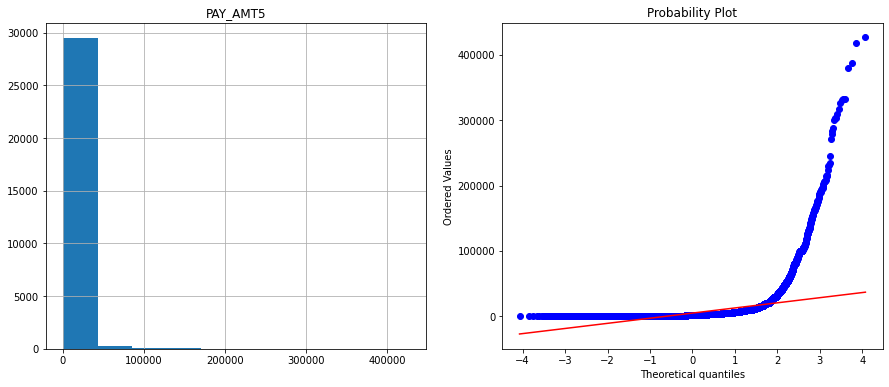

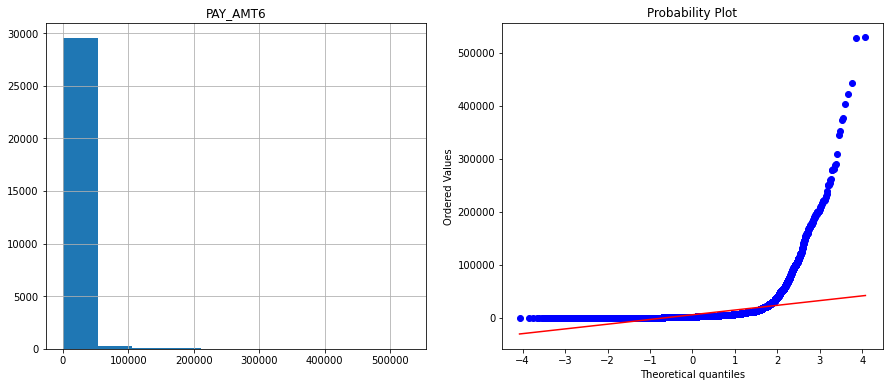

In [ ]:
plot_features(df,list_features)

Some of the variable names are very confusing eg.'PAY_0', 'BILL_AMT1', 'PAY_AMT1'. etc. We shall rename them according to the information that we have.

In [ ]:
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JULY','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR','BILL_AMT1':'BILL_AMT_SEP','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JULY','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR','PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JULY','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
#Creating a dataset that only has the data of the defaulters
df_default=df[df['default payment next month']==1]

# EDA (Exploratory Data Analysis)

In [ ]:
df['EDUCATION'].replace({1:'Graduate',2:'University',3:'High School',4:'Others_Edu'},inplace=True)
df_default['EDUCATION'].replace({1:'Graduate',2:'University',3:'High School',4:'Others_Edu'},inplace=True)
df['MARRIAGE'].replace({1:'Married',2:'Single',3:'Others_Mar'},inplace=True)
df_default['MARRIAGE'].replace({1:'Married',2:'Single',3:'Others_Mar'},inplace=True)
df['SEX'].replace({1:'Male',2:'Female'},inplace=True)
df_default['SEX'].replace({1:'Male',2:'Female'},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


## Univariate Analysis

In [ ]:
uvanalysis_list=['SEX','EDUCATION','MARRIAGE','PAY_SEPT','PAY_AUG','PAY_JULY','PAY_JUN','PAY_MAY','PAY_APR']

In [ ]:
#Defining a function to visualize the countplots of relevant variables
def uv_analysis(data,uv_var):
  plt.figure(figsize=(15,8))
  
  sns.countplot(data[uv_var])
  plt.title(uv_var)
  plt.show
  

In [ ]:
def plot_uv(data,uv_list):
  for i in uv_list:
    plot=uv_analysis(data,i)
  return plot

  

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

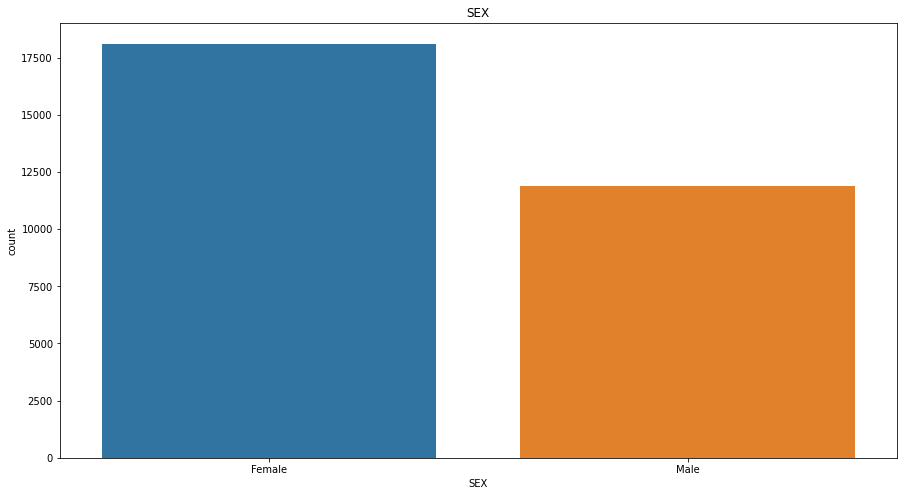

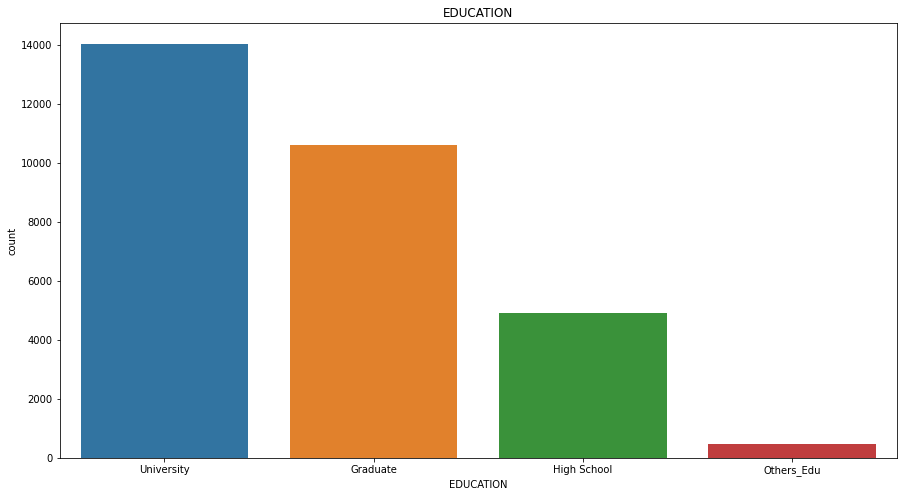

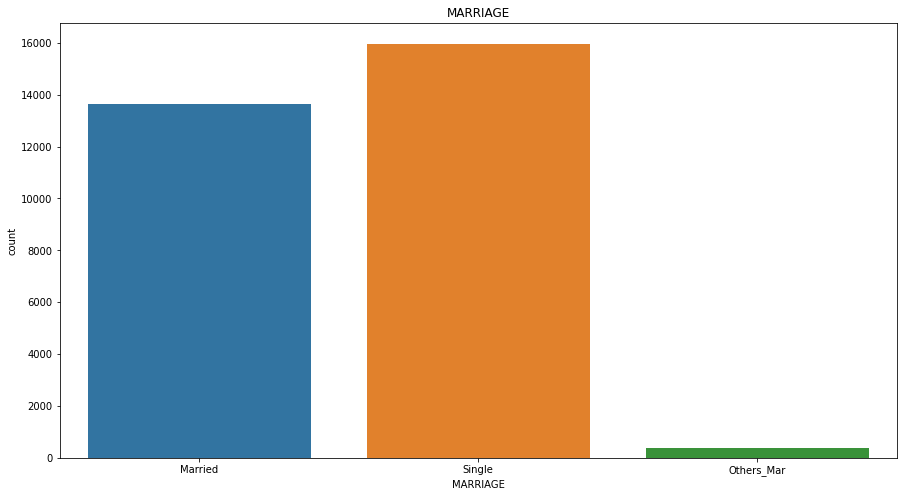

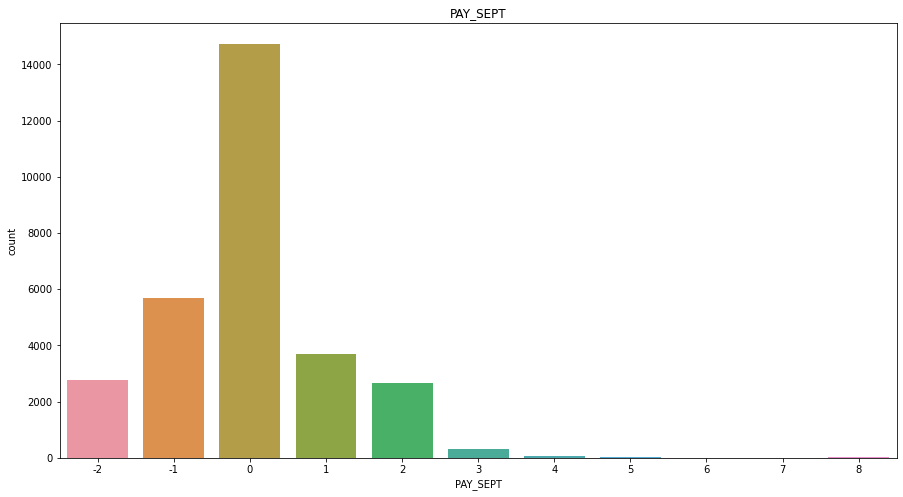

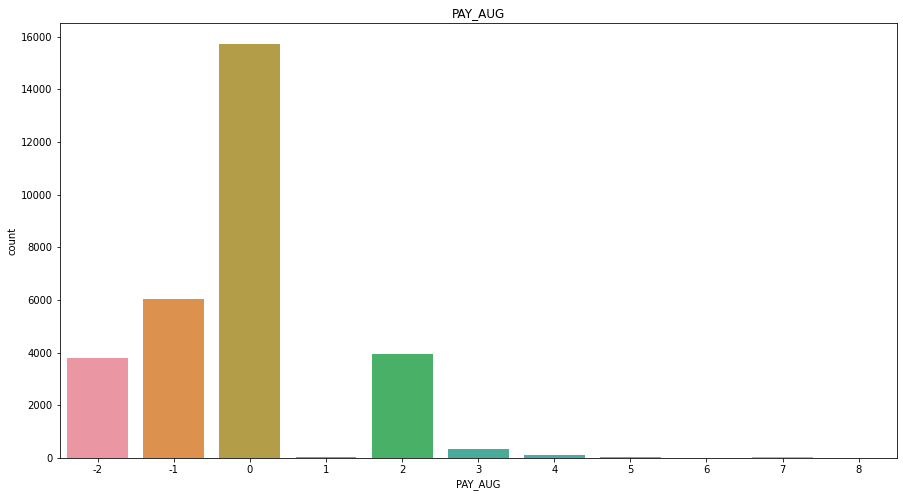

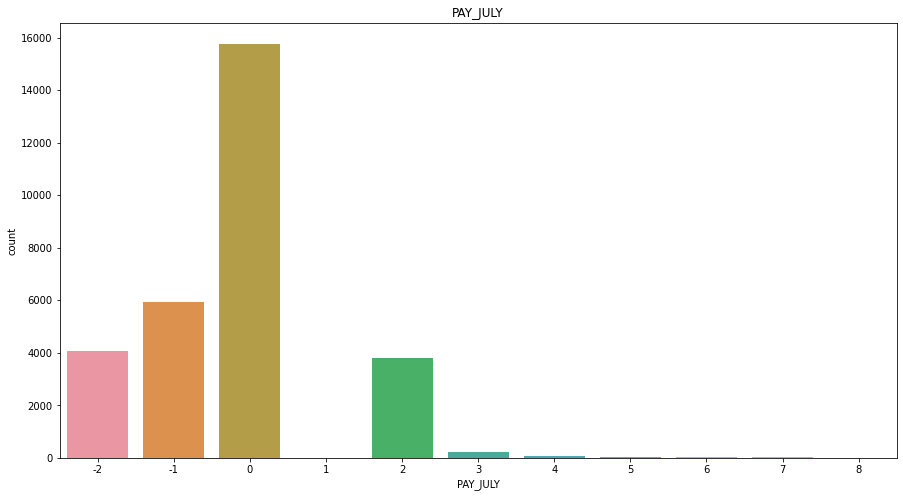

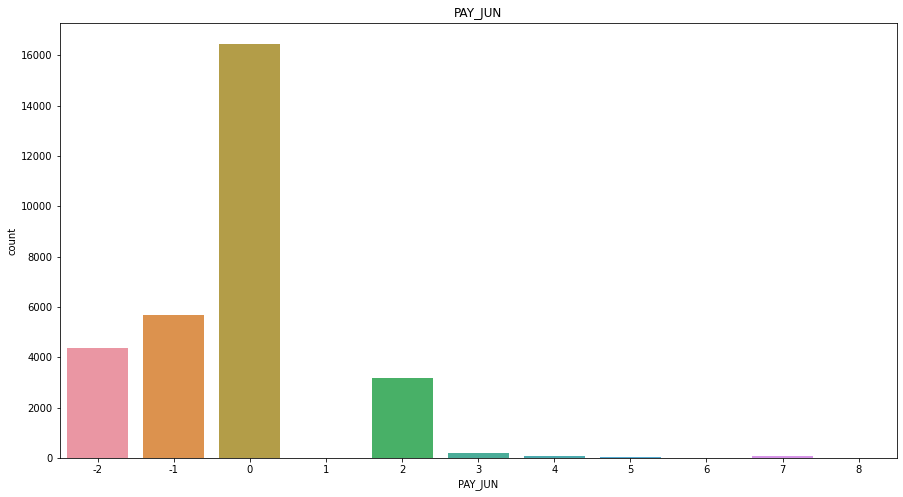

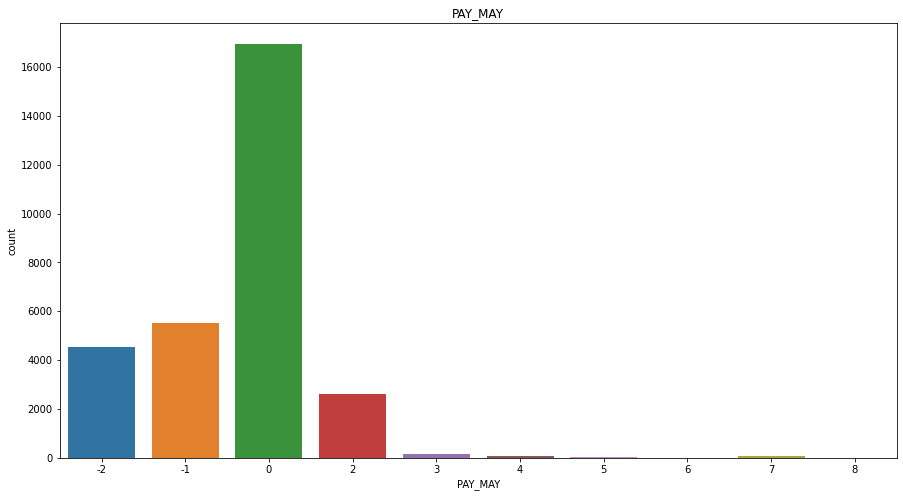

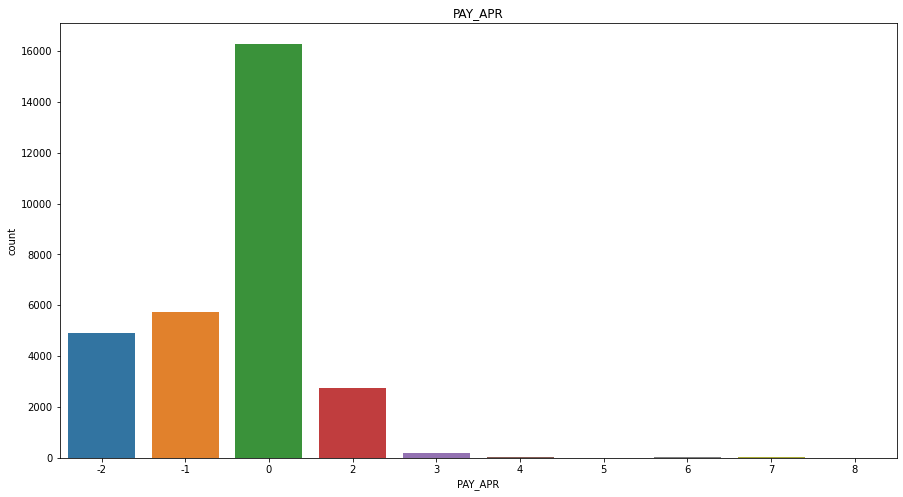

In [ ]:
plot_uv(df,uvanalysis_list)

**OBSERVATIONS:-**

We observe that 21-50 age group is predominantly using the Credit card service whereas the age group above 60 consists of mostly inactive users.

Majority of the Credit Card users are females.

Majority of the Credit Card users have studied in an University.

Majority of the Credit Card users are Single.

We also observed that most of the users have paid their last 6 month dues on time.

## Bivariate Analysis

In [ ]:
sex_df=df.groupby('SEX')['default payment next month'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
sex_df=sex_df[sex_df['default payment next month']==1]
mr_df=df.groupby('MARRIAGE')['default payment next month'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
mr_df=mr_df[mr_df['default payment next month']==1]
ed_df=df.groupby('EDUCATION')['default payment next month'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
ed_df=ed_df[ed_df['default payment next month']==1]


Text(0.5, 1.0, 'User Sex vs Default %')

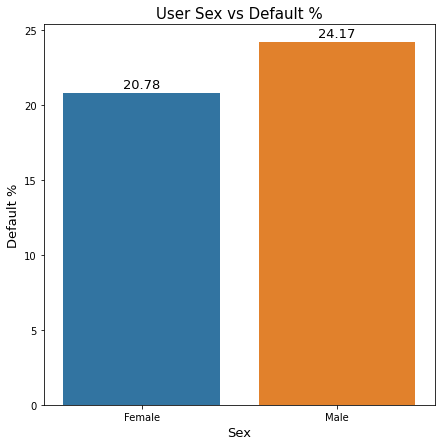

In [ ]:
plt.figure(figsize=(7,7))
plot_sex=sns.barplot(data=sex_df,x='SEX',y='Percentage')
for bar in plot_sex.patches:
  plot_sex.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Sex',size=13)
plt.ylabel('Default %',size=13)
plt.title('User Sex vs Default %',size=15)

Text(0.5, 1.0, 'User Marital Status vs Default %')

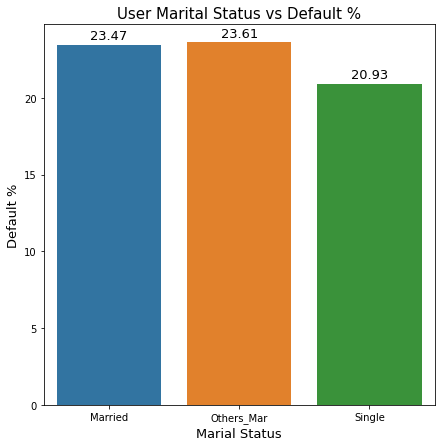

In [ ]:
plt.figure(figsize=(7,7))
plot_mr=sns.barplot(data=mr_df,x='MARRIAGE',y='Percentage')
for bar in plot_mr.patches:
  plot_mr.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Marial Status',size=13)
plt.ylabel('Default %',size=13)
plt.title('User Marital Status vs Default %',size=15)

Text(0.5, 1.0, 'User Education vs Default %')

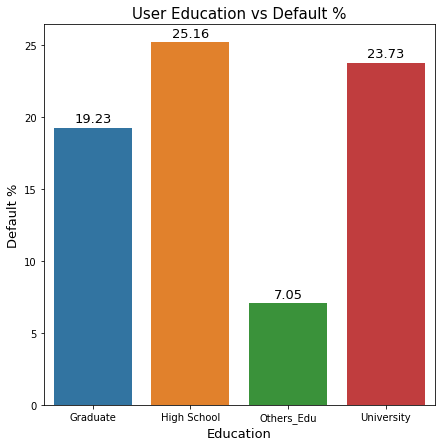

In [ ]:
plt.figure(figsize=(7,7))
plot_ed=sns.barplot(data=ed_df,x='EDUCATION',y='Percentage')
for bar in plot_ed.patches:
  plot_ed.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Education',size=13)
plt.ylabel('Default %',size=13)
plt.title('User Education vs Default %',size=15)

In [ ]:
df['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

In [ ]:
age_list=df['AGE']
age_group=[]
for i in age_list:
  if i>20 and i<=40:
    age_group.append('20-40')
  elif i>40 and i<=60:
    age_group.append('40-60')
  else:
    age_group.append('>60')

In [ ]:
df['Age_group']=age_group

In [ ]:
ag_df=df.groupby('Age_group')['default payment next month'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
ag_df=ag_df[ag_df['default payment next month']==1]

Text(0.5, 1.0, 'User Age Group vs Default %')

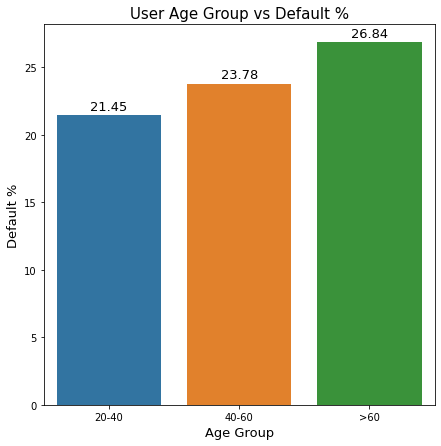

In [ ]:
plt.figure(figsize=(7,7))
plot_ag=sns.barplot(data=ag_df,x='Age_group',y='Percentage')
for bar in plot_ag.patches:
  plot_ag.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Age Group',size=13)
plt.ylabel('Default %',size=13)
plt.title('User Age Group vs Default %',size=15)

**OBSERVATIONS:-**

Male users tend to default on their payments more than female users.

Married users tend to default more on their payments comparatively.

Users who have passed high school have higher tendency to default on their payments followed by those who have been to University.

Also, users above the age of 60 have higher tendency to default on their payments comparatively.

In [ ]:
df.drop(['Age_group'],axis=1,inplace=True)

# Checking the correlation among the variables

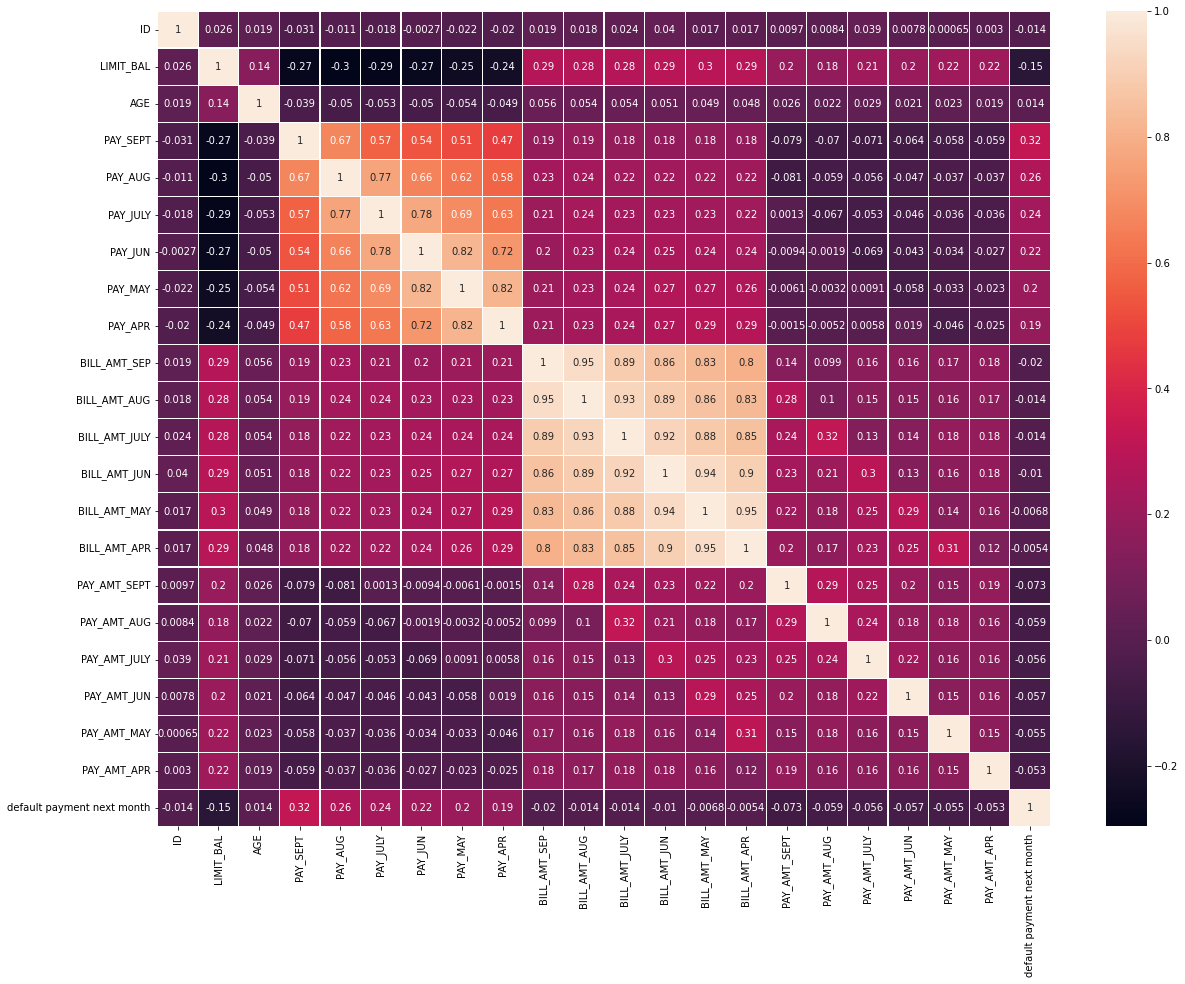

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(method='pearson'),annot=True,linewidths=0.2)

Most of the variables have low to moderate correlation but some have high correlation due to obvious reasons so we need not worry about that. Those variables cannot be removed as they contain important data.

In [ ]:
#Creating a dummy dataset and encoding various variables back to their usual form
df_dummy=df.copy()
df_dummy=df_dummy.replace({'SEX':{'Female':0,'Male':1}})
df_dummy=df_dummy.replace({'EDUCATION':{'Graduate':1,'University':2,'High School':3,'Others_Edu':4}})
df_dummy=df_dummy.replace({'MARRIAGE':{'Married':1,'Single':2,'Others_Mar':3}})
x=df_dummy.drop(['default payment next month'],axis=1)
y=df_dummy['default payment next month']


In [ ]:
df_dummy['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


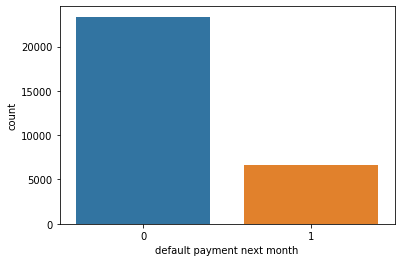

In [ ]:
sns.countplot(df_dummy['default payment next month'])

We observe that there is a considerable degree of imbalance in our dependent variable. Hence we will use SMOTE (Synthetic Minority Oversampling TEchnique) to oversample the minority labels in order to overcome it.

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE 
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(x,y)

In [ ]:
columns=list(df.columns)
columns.pop(-1)
df_copy_1=pd.DataFrame(x_sm,columns=columns)
df_copy_1['default payment next month']=y_sm

In [ ]:
df_copy_1['default payment next month'].value_counts()

1    23364
0    23364
Name: default payment next month, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


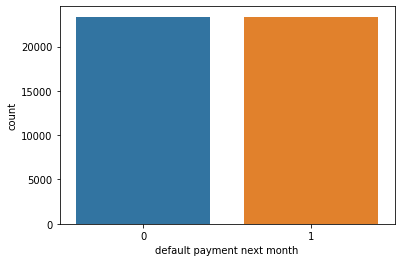

In [ ]:
#Comparing the labels in the dependent variable after smote through a countplot
sns.countplot(df_copy_1['default payment next month'])

In [ ]:
df_copy_1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default payment next month
0,1,20000,0,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# One Hot Encoding

In [ ]:
df_copy=df_copy_1.copy()
df_copy['EDUCATION'].replace({1:'Graduate',2:'University',3:'High School',4:'Others_Edu'},inplace=True)
df_copy['MARRIAGE'].replace({1:'Married',2:'Single',3:'Others_Mar'},inplace=True)



In [ ]:
df_copy=pd.get_dummies(df_copy,columns=['MARRIAGE','EDUCATION'])


In [ ]:
df_copy.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JULY',
       'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEP', 'BILL_AMT_AUG',
       'BILL_AMT_JULY', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JULY', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'default payment next month',
       'MARRIAGE_Married', 'MARRIAGE_Others_Mar', 'MARRIAGE_Single',
       'EDUCATION_Graduate', 'EDUCATION_High School', 'EDUCATION_Others_Edu',
       'EDUCATION_University'],
      dtype='object')

In [ ]:
df_copy=pd.get_dummies(df_copy,columns=['PAY_APR','PAY_MAY','PAY_JUN','PAY_JULY','PAY_AUG','PAY_SEPT'],drop_first=True)

In [ ]:
df_copy.shape

(46728, 84)

In [ ]:
#Defining X and Y variables in our final dataset
x=df_copy.drop(['default payment next month'],axis=1)
y=df_copy['default payment next month']


In [ ]:
df_copy.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,1,0,0,0,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#Scaling the independent features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=42,stratify=y)

In [ ]:
y_train.value_counts()

1    18691
0    18691
Name: default payment next month, dtype: int64

# Model Training

In [ ]:
#Importing the necessary libraries and metrics
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import f1_score as f1
from sklearn.metrics import classification_report as cr
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

Note:- While evaluating the models we will give more importance to 'recall scores' since the priority of the banks is to identify a potential defaulter.Whereas if a user is wrongly detected as a potential defaulter there will not be much problem.


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()


In [ ]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Hyperparameter Tuning

In [ ]:
params={
    
    'C':[1e-5,1e-4,1e-3,1e-2,5e-1,9e-1,1],
    
    'max_iter':[150,200,500,1000],
}
clf=GridSearchCV(lr,params,cv=5,return_train_score=False)
clf.fit(x_train,y_train)
print('best_score: ',clf.best_score_)
print('best_params: ',clf.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

best_score:  0.626103299628402
best_params:  {'C': 0.9, 'max_iter': 200}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr=LogisticRegression(max_iter=150,C=0.9)
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6244382623582281

In [ ]:
y_pred_lr=lr.predict(x_test)

In [ ]:
ps(y_test,y_pred_lr)

0.604755899837867

In [ ]:
y_pred_test_lr=lr.predict(x_test)
y_pred_train_lr=lr.predict(x_train)

In [ ]:
rs(y_test,y_pred_lr)

0.718382195591697

In [ ]:

#Train metrics
tr_rs_lr=rs(y_train,y_pred_train_lr)
tr_ps_lr=ps(y_train,y_pred_train_lr)
tr_ac_lr=ac(y_train,y_pred_train_lr)
tr_f1_lr=f1(y_train,y_pred_train_lr)
#Test metrics
ts_rs_lr=rs(y_test,y_pred_test_lr)
ts_ps_lr=ps(y_test,y_pred_test_lr)
ts_ac_lr=ac(y_test,y_pred_test_lr)
ts_f1_lr=f1(y_test,y_pred_test_lr)
print("Train accuracy: ",tr_ac_lr)
print("Train recall: ",tr_rs_lr)
print("Train precision: ",tr_ps_lr)
print("Train f1 score: ",tr_f1_lr)
print("Test accuracy: ",ts_ac_lr)
print("Test recall: ",ts_rs_lr)
print("Test precision: ",ts_ps_lr)
print("Test f1 score: ",ts_f1_lr)


Train accuracy:  0.6257557113049061
Train recall:  0.714836017334546
Train precision:  0.6067390218427864
Train f1 score:  0.656366673216742
Test accuracy:  0.6244382623582281
Test recall:  0.718382195591697
Test precision:  0.604755899837867
Test f1 score:  0.6566901408450705


Text(0.5, 1.0, 'Logistic Regression')

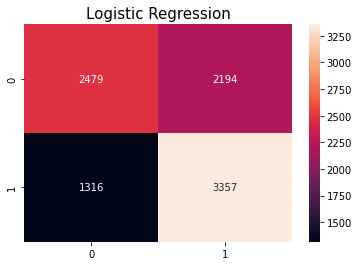

In [ ]:
sns.heatmap(cm(y_test,y_pred_test_lr),annot=True,fmt='g')
plt.title('Logistic Regression',size=15)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:

rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.845388401455168

In [ ]:
y_pred_train_rf=rf.predict(x_train)
y_pred_test_rf=rf.predict(x_test)
rs(y_test,y_pred_test_rf)

0.8255938369355874

In [ ]:
ps(y_test,y_pred_test_rf)

0.8596256684491979

In [ ]:

#Train metrics
tr_rs_rf=rs(y_train,y_pred_train_rf)
tr_ps_rf=ps(y_train,y_pred_train_rf)
tr_ac_rf=ac(y_train,y_pred_train_rf)
tr_f1_rf=f1(y_train,y_pred_train_rf)
#Test metrics
ts_rs_rf=rs(y_test,y_pred_test_rf)
ts_ps_rf=ps(y_test,y_pred_test_rf)
ts_ac_rf=ac(y_test,y_pred_test_rf)
ts_f1_rf=f1(y_test,y_pred_test_rf)
print("Train accuracy: ",tr_ac_rf)
print("Train recall: ",tr_rs_rf)
print("Train precision: ",tr_ps_rf)
print("Train f1 score: ",tr_f1_rf)
print("Test accuracy: ",ts_ac_rf)
print("Test recall: ",ts_rs_rf)
print("Test precision: ",ts_ps_rf)
print("Test f1 score: ",ts_f1_rf)

Train accuracy:  1.0
Train recall:  1.0
Train precision:  1.0
Train f1 score:  1.0
Test accuracy:  0.845388401455168
Test recall:  0.8255938369355874
Test precision:  0.8596256684491979
Test f1 score:  0.8422661281519486


Text(0.5, 1.0, 'Random Forest')

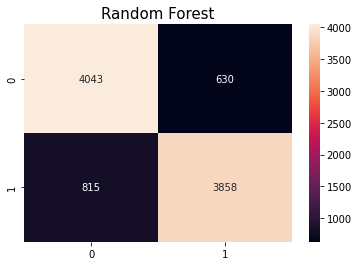

In [ ]:
sns.heatmap(cm(y_test,y_pred_test_rf),annot=True,fmt='g')
plt.title('Random Forest',size=15)

## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB(var_smoothing=1e-30)
gnb.fit(x_train,y_train)
gnb.score(x_test,y_test)


0.5916969826663814

In [ ]:
y_pred_train_gnb=gnb.predict(x_train)
y_pred_test_gnb=gnb.predict(x_test)

In [ ]:

#Train metrics
tr_rs_gnb=rs(y_train,y_pred_train_gnb)
tr_ps_gnb=ps(y_train,y_pred_train_gnb)
tr_ac_gnb=ac(y_train,y_pred_train_gnb)
tr_f1_gnb=f1(y_train,y_pred_train_gnb)
#Test metrics
ts_rs_gnb=rs(y_test,y_pred_test_gnb)
ts_ps_gnb=ps(y_test,y_pred_test_gnb)
ts_ac_gnb=ac(y_test,y_pred_test_gnb)
ts_f1_gnb=f1(y_test,y_pred_test_gnb)
print("Train accuracy: ",tr_ac_gnb)
print("Train recall: ",tr_rs_gnb)
print("Train precision: ",tr_ps_gnb)
print("Train f1 score: ",tr_f1_gnb)
print("Test accuracy: ",ts_ac_gnb)
print("Test recall: ",ts_rs_gnb)
print("Test precision: ",ts_ps_gnb)
print("Test f1 score: ",ts_f1_gnb)

Train accuracy:  0.5917553902947943
Train recall:  0.9093146434112674
Train precision:  0.5561154374713697
Train f1 score:  0.6901508537551013
Test accuracy:  0.5916969826663814
Test recall:  0.9060560667665312
Test precision:  0.5563000919721456
Test f1 score:  0.6893520026050147


Text(0.5, 1.0, 'Gaussian Naive Bayes')

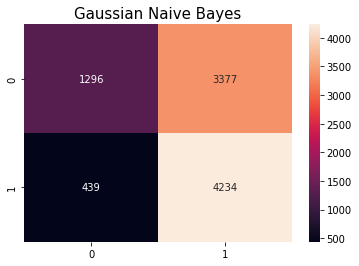

In [ ]:
sns.heatmap(cm(y_test,y_pred_test_gnb),annot=True,fmt='g')
plt.title('Gaussian Naive Bayes',size=15)

## XG Boost

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=2000,learning_rate=0.01,max_depth=30)
xgb.fit(x_train,y_train)
xgb.score(x_test,y_test)

0.8626150224695057

In [ ]:
y_pred_train_xgb=xgb.predict(x_train)
y_pred_test_xgb=xgb.predict(x_test)
#Train metrics
tr_rs_xgb=rs(y_train,y_pred_train_xgb)
tr_ps_xgb=ps(y_train,y_pred_train_xgb)
tr_ac_xgb=ac(y_train,y_pred_train_xgb)
tr_f1_xgb=f1(y_train,y_pred_train_xgb)
#Test metrics
ts_rs_xgb=rs(y_test,y_pred_test_xgb)
ts_ps_xgb=ps(y_test,y_pred_test_xgb)
ts_ac_xgb=ac(y_test,y_pred_test_xgb)
ts_f1_xgb=f1(y_test,y_pred_test_xgb)
print("Train accuracy: ",tr_ac_xgb)
print("Train recall: ",tr_rs_xgb)
print("Train precision: ",tr_ps_xgb)
print("Train f1 score: ",tr_f1_xgb)
print("Test accuracy: ",ts_ac_xgb)
print("Test recall: ",ts_rs_xgb)
print("Test precision: ",ts_ps_xgb)
print("Test f1 score: ",ts_f1_xgb)


Train accuracy:  1.0
Train recall:  1.0
Train precision:  1.0
Train f1 score:  1.0
Test accuracy:  0.8626150224695057
Test recall:  0.8495613096511877
Test precision:  0.8723357503845308
Test f1 score:  0.8607979184735473


Text(0.5, 1.0, 'XG Boost')

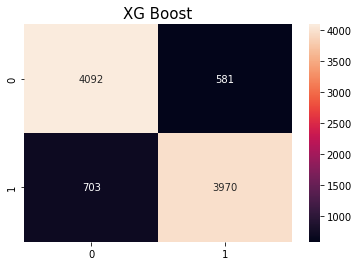

In [ ]:
sns.heatmap(cm(y_test,y_pred_test_xgb),annot=True,fmt='g')
plt.title('XG Boost',size=15)

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='entropy',max_depth=20,random_state=10)
dc.fit(x_train,y_train)
dc.score(x_test,y_test)

0.7519794564519581

In [ ]:
y_pred_test_dc=dc.predict(x_test)
y_pred_train_dc=dc.predict(x_train)


In [ ]:

#Train metrics
tr_rs_dc=rs(y_train,y_pred_train_dc)
tr_ps_dc=ps(y_train,y_pred_train_dc)
tr_ac_dc=ac(y_train,y_pred_train_dc)
tr_f1_dc=f1(y_train,y_pred_train_dc)
#Test metrics
ts_rs_dc=rs(y_test,y_pred_test_dc)
ts_ps_dc=ps(y_test,y_pred_test_dc)
ts_ac_dc=ac(y_test,y_pred_test_dc)
ts_f1_dc=f1(y_test,y_pred_test_dc)
print("Train accuracy: ",tr_ac_dc)
print("Train recall: ",tr_rs_dc)
print("Train precision: ",tr_ps_dc)
print("Train f1 score: ",tr_f1_dc)
print("Test accuracy: ",ts_ac_dc)
print("Test recall: ",ts_rs_dc)
print("Test precision: ",ts_ps_dc)
print("Test f1 score: ",ts_f1_dc)

Train accuracy:  0.9552190894013162
Train recall:  0.9476753517735809
Train precision:  0.9621924058884241
Train f1 score:  0.954878706199461
Test accuracy:  0.7519794564519581
Test recall:  0.7528354376203723
Test precision:  0.7515488143559068
Test f1 score:  0.7521915757964507


Text(0.5, 1.0, 'Decision Tree Classifier')

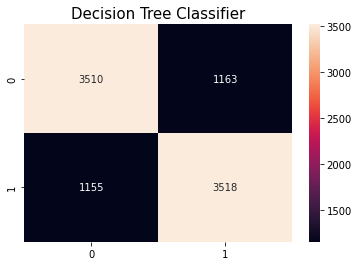

In [ ]:
sns.heatmap(cm(y_test,y_pred_test_dc),annot=True,fmt='g')
plt.title('Decision Tree Classifier',size=15)

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8221699122619303

In [ ]:
y_pred_train_knn=knn.predict(x_train)
y_pred_test_knn=knn.predict(x_test)

rs(y_test,y_pred_test_knn)

0.9381553605820672

In [ ]:
#Train metrics
tr_rs_knn=rs(y_train,y_pred_train_knn)
tr_ps_knn=ps(y_train,y_pred_train_knn)
tr_ac_knn=ac(y_train,y_pred_train_knn)
tr_f1_knn=f1(y_train,y_pred_train_knn)
#Test metrics
ts_rs_knn=rs(y_test,y_pred_test_knn)
ts_ps_knn=ps(y_test,y_pred_test_knn)
ts_ac_knn=ac(y_test,y_pred_test_knn)
ts_f1_knn=f1(y_test,y_pred_test_knn)
print("Train accuracy: ",tr_ac_knn)
print("Train recall: ",tr_rs_knn)
print("Train precision: ",tr_ps_knn)
print("Train f1 score: ",tr_f1_knn)
print("Test accuracy: ",ts_ac_knn)
print("Test recall: ",ts_rs_knn)
print("Test precision: ",ts_ps_knn)
print("Test f1 score: ",ts_f1_knn)

Train accuracy:  1.0
Train recall:  1.0
Train precision:  1.0
Train f1 score:  1.0
Test accuracy:  0.8221699122619303
Test recall:  0.9381553605820672
Test precision:  0.7615077297203404
Test f1 score:  0.8406519654841803


Text(0.5, 1.0, 'KNN')

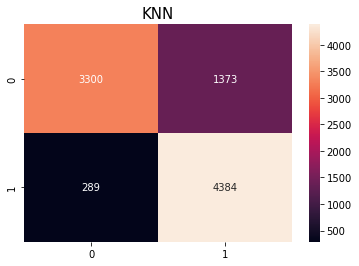

In [ ]:
sns.heatmap(cm(y_test,y_pred_test_knn),annot=True,fmt='g')
plt.title('KNN',size=15)

## Support Vector Classifier (SVC)

In [ ]:
from sklearn.svm import SVC
svc=SVC(C=10)
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.6429488551251873

In [ ]:
y_pred_train_svc=svc.predict(x_train)
y_pred_test_svc=svc.predict(x_test)

In [ ]:
#Train metrics
tr_rs_svc=rs(y_train,y_pred_train_svc)
tr_ps_svc=ps(y_train,y_pred_train_svc)
tr_ac_svc=ac(y_train,y_pred_train_svc)
tr_f1_svc=f1(y_train,y_pred_train_svc)
#Test metrics
ts_rs_svc=rs(y_test,y_pred_test_svc)
ts_ps_svc=ps(y_test,y_pred_test_svc)
ts_ac_svc=ac(y_test,y_pred_test_svc)
ts_f1_svc=f1(y_test,y_pred_test_svc)
print("Train accuracy: ",tr_ac_svc)
print("Train recall: ",tr_rs_svc)
print("Train precision: ",tr_ps_svc)
print("Train f1 score: ",tr_f1_svc)
print("Test accuracy: ",ts_ac_svc)
print("Test recall: ",ts_rs_svc)
print("Test precision: ",ts_ps_svc)
print("Test f1 score: ",ts_f1_svc)

Train accuracy:  0.6515435236209941
Train recall:  0.8049328553849446
Train precision:  0.6159672466734902
Train f1 score:  0.6978847759532424
Test accuracy:  0.6429488551251873
Test recall:  0.7992724160068478
Test precision:  0.6089012063906097
Test f1 score:  0.691218654575738


Text(0.5, 1.0, 'SVC')

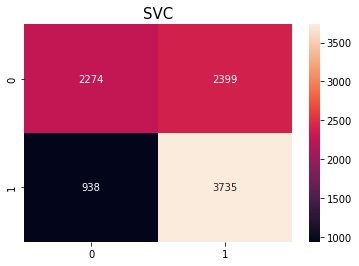

In [ ]:
sns.heatmap(cm(y_test,y_pred_test_svc),annot=True,fmt='g')
plt.title('SVC',size=15)

We see that while some of the models overfit the training data but they provide decent recall scores. Let us summarize the model performances.

# Summary

In [ ]:
#Creating two dataframes containing the performances of the models on the train and test dataset respectively.
models=['Logistic Regression','Random Forest','Gaussian Naive Bayes','XG Boost','Decision Tree Classifier','KNN','SVC']
tr_ac=[tr_ac_lr,tr_ac_rf,tr_ac_gnb,tr_ac_xgb,tr_ac_dc,tr_ac_knn,tr_ac_svc]
tr_ps=[tr_ps_lr,tr_ps_rf,tr_ps_gnb,tr_ps_xgb,tr_ps_dc,tr_ps_knn,tr_ps_svc]
tr_rs=[tr_rs_lr,tr_rs_rf,tr_rs_gnb,tr_rs_xgb,tr_rs_dc,tr_rs_knn,tr_rs_svc]
tr_f1=[tr_f1_lr,tr_f1_rf,tr_f1_gnb,tr_f1_xgb,tr_f1_dc,tr_f1_knn,tr_f1_svc]
ts_ac=[ts_ac_lr,ts_ac_rf,ts_ac_gnb,ts_ac_xgb,ts_ac_dc,ts_ac_knn,ts_ac_svc]
ts_ps=[ts_ps_lr,ts_ps_rf,ts_ps_gnb,ts_ps_xgb,ts_ps_dc,ts_ps_knn,ts_ps_svc]
ts_rs=[ts_rs_lr,ts_rs_rf,ts_rs_gnb,ts_rs_xgb,ts_rs_dc,ts_rs_knn,ts_rs_svc]
ts_f1=[ts_f1_lr,ts_f1_rf,ts_f1_gnb,ts_f1_xgb,ts_f1_dc,ts_f1_knn,ts_f1_svc]


In [ ]:
df_train_summary=pd.DataFrame({'Models':models,'Train Accuracy':tr_ac,'Train Precision':tr_ps,'Train Recall':tr_rs,'Train f1 Score':tr_f1})
df_train_summary

,Models,Train Accuracy,Train Precision,Train Recall,Train f1 Score
0,Logistic Regression,0.625756,0.606739,0.714836,0.656367
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,Gaussian Naive Bayes,0.591755,0.556115,0.909315,0.690151
3,XG Boost,1.000000,1.000000,1.000000,1.000000
4,Decision Tree,0.955219,0.962192,0.947675,0.954879
5,KNN,1.000000,1.000000,1.000000,1.000000
6,SVC,0.651544,0.615967,0.804933,0.697885


In [ ]:
df_test_summary=pd.DataFrame({'Models':models,'Test Accuracy':ts_ac,'Test Precision':ts_ps,'Test Recall':ts_rs,'Test f1 Score':ts_f1})
df_test_summary

,Models,Test Accuracy,Test Precision,Test Recall,Test f1 Score
0,Logistic Regression,0.624438,0.604756,0.718382,0.656690
1,Random Forest,0.845388,0.859626,0.825594,0.842266
2,Gaussian Naive Bayes,0.591697,0.556300,0.906056,0.689352
3,XG Boost,0.862615,0.872336,0.849561,0.860798
4,Decision Tree,0.751979,0.751549,0.752835,0.752192
5,KNN,0.822170,0.761508,0.938155,0.840652
6,SVC,0.642949,0.608901,0.799272,0.691219


### From the above tables we conclude that Random Forest,XG Boost, Gaussian Naive Bayes gives us decent recall scores that are 0.82, 0.84, 0.89 respectively.

### Whereas KNN gives a very good recall score i.e 0.94.

### So we can select KNN as the optimum model for our problem statement.
